Funciones:

+: Parametros = a,b

   Suma a y b, devuelve a + b

-: Parametros = a,b

   Resta a y b, devuelve a + b

UP: Parametros = a,b

  El robot se mueve hacia arriba en a unidades, devuelve b

DOWN: Parametros = a,b

  El robot se mueve hacia abajo en a unidades, devuelve b

LEFT: Parametros = a,b

  El robot se mueve hacia la izquierda en a unidades, devuelve b

RIGHT: Parametros = a,b

  El robot se mueve hacia la derecha en a unidades, devuelve b

Terminales:

Posiciones X y Y del robot

Componentes X, Y de posiciones de cada ingeniero

Elemento neutro (0)

In [ ]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

class Ingeniero:
  def __init__(self, posX,posY):
    self.posX = posX
    self.posY = posY

salaDimX = 150
salaDimY = 150
robotPosX = random.randrange(salaDimX)
robotPosY = random.randrange(salaDimY)
ingenieros = []
for i in range(6):
  ingeniero = Ingeniero(random.randrange(salaDimX),random.randrange(salaDimY))
  while ingeniero.posX == robotPosX and ingeniero.posY == robotPosY:
    ingeniero = Ingeniero(random.randrange(salaDimX),random.randrange(salaDimY))
  ingenieros.append(copy.deepcopy(ingeniero))

funciones = ["+","-","UP","DOWN","LEFT","RIGHT"]
terminales = [robotPosX,robotPosY]
for ing in ingenieros:
  terminales.append(ing.posX)
  terminales.append(ing.posY)
terminales.append(0)

print(terminales)


[139, 88, 60, 70, 40, 81, 127, 30, 77, 113, 97, 45, 49, 24, 0]


Funcion de aptitud:
El robot recibe  [(Longitud X de la sala + Longitud Y de la sala) // 2]  puntos por cada ingeniero al que le entrega una galleta, para entregarles la galleta debe llegar a sus posiciones exactas. Hay penalizacion por realizar un recorrido demasiado largo y por chocarse con las paredes de la sala.


In [ ]:
SAMPLE = 800
ITER = 250

class TerminalNodo:
  def __init__(self, dato):
    self.dato = dato

  def getPolaca(self):
    return [self.dato]

  def getPolacaNodos(self):
    return [self]

  def getNodo(self,i):
    assert i == 0
    return self.getPolacaNodos()[i]

class FuncionNodo:
  def __init__(self, izq, der, dato):
    self.izq = izq
    self.der = der
    self.dato = dato

  def getPolaca(self):
    if type(self.dato) != int:
      return self.izq.getPolaca() + self.der.getPolaca() + [self.dato]
    else:
      return [self.dato]

  def getPolacaNodos(self):
    if type(self.dato) != int:
      return self.izq.getPolacaNodos() + self.der.getPolacaNodos() + [self]
    else:
      return [self]

  def getNodo(self,i):
    return self.getPolacaNodos()[i]

class Pila:
  def __init__(self):
    self.datos = []

  def push(self, dato):
    self.datos.append(dato)

  def pop(self):
    return self.datos.pop()

  def leer(self):
    return self.datos[len(self.datos)-1]

  def len(self):
    return len(self.datos)

#crear candidato inicial aleatoriamente
def generarCandidato():
  hoja1 = FuncionNodo(None,None,terminales[random.randrange(len(terminales))])
  hoja2 = FuncionNodo(None,None,terminales[random.randrange(len(terminales))])
  hoja3 = FuncionNodo(None,None,terminales[random.randrange(len(terminales))])
  hoja4 = FuncionNodo(None,None,terminales[random.randrange(len(terminales))])
  sub1 = FuncionNodo(hoja1,hoja2,funciones[random.randrange(len(funciones))])
  sub2 = FuncionNodo(hoja3,hoja4,funciones[random.randrange(len(funciones))])
  raiz = FuncionNodo(sub1,sub2,funciones[random.randrange(len(funciones))])
  return raiz

#generar lista de cromosomas
cromosomas = []
for i in range(SAMPLE):
  cromosomas.append(generarCandidato())

#funcion de evaluacion
def ejecutarCodigo(arbol):
  global robotPosX
  global robotPosY
  posX = robotPosX
  posY = robotPosY
  codigo = arbol.getPolaca()
  #print(codigo)
  pila = Pila()
  dist = 0
  faltaGalleta = copy.deepcopy(ingenieros)
  puntos = 0
  for i in codigo:
    if type(i) == int:
      pila.push(i)
    else:
      a = pila.pop()
      b = pila.pop()
      if i == "+":
        pila.push(a + b)
      elif i == "-":
        pila.push(abs(a - b))
      elif i == "UP":
        prevY = posY
        posY += a
        if posY >= salaDimY:
          puntos -= 5
          posY = salaDimY - 1
        dist += abs(posY - prevY)
        for ing in faltaGalleta:
          if ing.posX == posX and ing.posY <= posY and ing.posY > prevY:
            faltaGalleta.remove(ing)
            puntos += (salaDimX + salaDimY) // 2
        pila.push(b)
      elif i == "DOWN":
        prevY = posY
        posY -= a
        if posY < 0:
          puntos -= 5
          posY = 0
        dist += abs(posY - prevY)
        for ing in faltaGalleta:
          if ing.posX == posX and ing.posY >= posY and ing.posY < prevY:
            faltaGalleta.remove(ing)
            puntos += (salaDimX + salaDimY) // 2
        pila.push(b)
      elif i == "LEFT":
        prevX = posX
        posX -= a
        if posX < 0:
          puntos -= 5
          posX = 0
        dist += abs(posX - prevX)
        for ing in faltaGalleta:
          if ing.posY == posY and ing.posX >= posX and ing.posX < prevX:
            faltaGalleta.remove(ing)
            puntos += (salaDimX + salaDimY) // 2
        pila.push(b)
      elif i == "RIGHT":
        prevX = posX
        posX += a
        if posX >= salaDimX:
          puntos -= 5
          posX = salaDimX - 1
        dist += abs(posX - prevX)
        for ing in faltaGalleta:
          if ing.posY == posY and ing.posX <= posX and ing.posX > prevX:
            faltaGalleta.remove(ing)
            puntos += (salaDimX + salaDimY) // 2
        pila.push(b)
  if dist > 1000:
    puntos -= (dist - 1000) // 10
  puntos = max(puntos,1)
  return puntos

#evaluacion
apt = np.zeros(SAMPLE)
def eval():
  for i in range(SAMPLE):
    apt[i] = ejecutarCodigo(cromosomas[i])

#probabilidades
probabilidades = np.zeros(SAMPLE)
def prob():
  t = 0
  for i in range(SAMPLE):
    t += apt[i]
  for i in range(SAMPLE):
    if t != 0:
      probabilidades[i] = apt[i] / t

#seleccion de padres
padres = copy.deepcopy(cromosomas)
def getPadres():
  global padres
  padres = []
  for i in range(SAMPLE):
    total = 0
    r = random.random()
    for j in range(SAMPLE):
      total += probabilidades[j]
      if r < total:
        padres.append(copy.deepcopy(cromosomas[j]))
        break

#cruce
def cruzar():
  for i in range(0,SAMPLE-1,2):
    cromosomas[i] = copy.deepcopy(padres[i])
    cromosomas[i+1] = copy.deepcopy(padres[i+1])
    nodos1 = cromosomas[i].getPolacaNodos()
    nodos2 = cromosomas[i+1].getPolacaNodos()
    ind1 = random.randrange(len(nodos1))
    ind2 = random.randrange(len(nodos2))
    a = copy.deepcopy(nodos1[ind1])
    #print(cromosomas[i].getPolaca())
    #print(cromosomas[i+1].getPolaca())
    #print("-------")
    #print(nodos1[ind1].getPolaca())
    #print(nodos2[ind2].getPolaca())
    #print("-------")
    nodos1[ind1].der = nodos2[ind2].der
    nodos1[ind1].izq = nodos2[ind2].izq
    nodos1[ind1].dato = nodos2[ind2].dato
    nodos2[ind2].der = a.der
    nodos2[ind2].izq = a.izq
    nodos2[ind2].dato = a.dato
    #print(cromosomas[i].getPolaca())
    #print(cromosomas[i+1].getPolaca())
    #print("-------")
    #print("-------")

#mutacion
def mut():
  ri = random.randrange(len(cromosomas))
  nodos = cromosomas[ri].getPolacaNodos()
  rj = random.randrange(len(nodos))
  if type(nodos[rj].dato) == int:
    rk = random.randrange(len(terminales))
    nodos[rj].dato = terminales[rk]
  else:
    rk = random.randrange(len(funciones))
    nodos[rj].dato = funciones[rk]



for i in range(ITER):
  #for j in cromosomas:
  #  print(j.getPolaca())
  apt = np.zeros(SAMPLE, dtype=int)
  eval()
  print("Generacion " + str(i+1))
  print("Puntaje promedio: " + str(np.average(apt)))
  print("Mejor puntaje: " + str(np.max(apt)))
  print("-----------------")
  prob()
  getPadres()
  cruzar()
  for i in range(20):
    mut()

print("resultados:")
print("Mejor puntaje: " + str(np.max(apt)))
print("Mejor candidato:")
print(cromosomas[np.where(apt==np.max(apt))[0][0]].getPolaca())

#for i in cromosomas:
#  print(i.getPolaca())

Generacion 1
Puntaje promedio: 1.18625
Mejor puntaje: 150
-----------------
Generacion 2
Puntaje promedio: 12.03125
Mejor puntaje: 150
-----------------
Generacion 3
Puntaje promedio: 68.355
Mejor puntaje: 295
-----------------
Generacion 4
Puntaje promedio: 82.5225
Mejor puntaje: 295
-----------------
Generacion 5
Puntaje promedio: 92.82125
Mejor puntaje: 290
-----------------
Generacion 6
Puntaje promedio: 93.31375
Mejor puntaje: 295
-----------------
Generacion 7
Puntaje promedio: 92.86375
Mejor puntaje: 415
-----------------
Generacion 8
Puntaje promedio: 106.29625
Mejor puntaje: 420
-----------------
Generacion 9
Puntaje promedio: 116.1675
Mejor puntaje: 420
-----------------
Generacion 10
Puntaje promedio: 131.4075
Mejor puntaje: 503
-----------------
Generacion 11
Puntaje promedio: 152.0475
Mejor puntaje: 514
-----------------
Generacion 12
Puntaje promedio: 172.84
Mejor puntaje: 514
-----------------
Generacion 13
Puntaje promedio: 191.99
Mejor puntaje: 515
-----------------
Ge

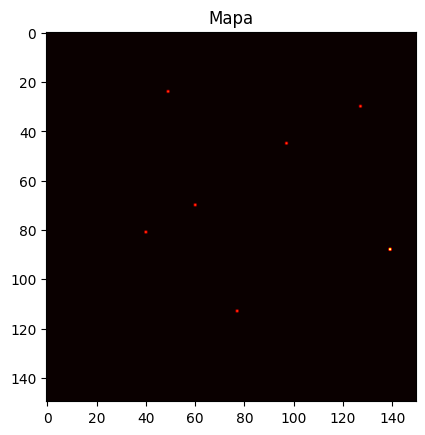

rojo - posicion de un ingeniero
blanco - posicion inicial del robot


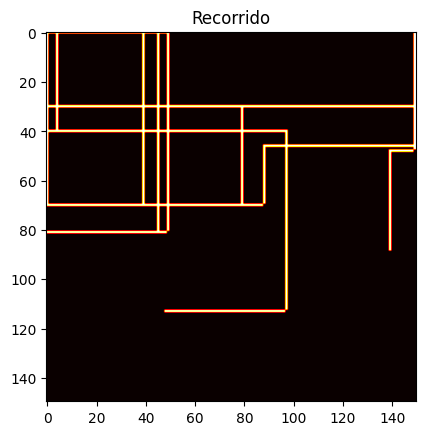

distancia recorrida: 1494


In [29]:
def recorrido(arbol):
  global robotPosX
  global robotPosY
  posX = robotPosX
  posY = robotPosY
  mapa = np.zeros((salaDimY,salaDimX))
  mapa[robotPosY][robotPosX] = 2
  codigo = arbol.getPolaca()
  #print(codigo)
  pila = Pila()
  dist = 0
  faltaGalleta = copy.deepcopy(ingenieros)
  for i in codigo:
    if type(i) == int:
      pila.push(i)
    else:
      a = pila.pop()
      b = pila.pop()
      if i == "+":
        pila.push(a + b)
      elif i == "-":
        pila.push(abs(a - b))
      elif i == "UP":
        prevY = posY
        posY += a
        if posY >= salaDimY:
          posY = salaDimY - 1
        dist += abs(posY - prevY)
        for ing in faltaGalleta:
          if ing.posX == posX and ing.posY <= posY and ing.posY > prevY:
            faltaGalleta.remove(ing)
        for j in range(prevY,posY):
          mapa[j][posX] = 2
        pila.push(b)
      elif i == "DOWN":
        prevY = posY
        posY -= a
        if posY < 0:
          posY = 0
        dist += abs(posY - prevY)
        for ing in faltaGalleta:
          if ing.posX == posX and ing.posY >= posY and ing.posY < prevY:
            faltaGalleta.remove(ing)
        for j in range(posY,prevY):
          mapa[j][posX] = 2
        pila.push(b)
      elif i == "LEFT":
        prevX = posX
        posX -= a
        if posX < 0:
          posX = 0
        dist += abs(posX - prevX)
        for ing in faltaGalleta:
          if ing.posY == posY and ing.posX >= posX and ing.posX < prevX:
            faltaGalleta.remove(ing)
        for j in range(posX,prevX):
          mapa[posY][j] = 2
        pila.push(b)
      elif i == "RIGHT":
        prevX = posX
        posX += a
        if posX >= salaDimX:
          posX = salaDimX - 1
        dist += abs(posX - prevX)
        for ing in faltaGalleta:
          if ing.posY == posY and ing.posX <= posX and ing.posX > prevX:
            faltaGalleta.remove(ing)
        for j in range(prevX,posX):
          mapa[posY][j] = 2
        pila.push(b)
  return mapa, dist

mapa = np.zeros((salaDimY,salaDimX))
mapa[robotPosY][robotPosX] = 2
for i in ingenieros:
  mapa[i.posY][i.posX] = 1

plt.imshow(mapa, cmap="hot")
plt.title(f"Mapa")
plt.show()
print("rojo - posicion de un ingeniero")
print("blanco - posicion inicial del robot")

rec, distancia = recorrido(cromosomas[np.where(apt==np.max(apt))[0][0]])
plt.imshow(rec, cmap="hot")
plt.title(f"Recorrido")
plt.show()
print("distancia recorrida: " + str(distancia))